In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [5]:
Insurance = pd.read_csv("insurance.csv")
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
#Checking for the number of rows and columns present in the dataset
Insurance.shape

(1338, 7)

In [16]:
#Checking for null values
Insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [17]:
#Cheking For Duplicates
Insurance.duplicated().any()

True

# Exploratory Data Analysis

C:\Users\Anil R\AppData\Local\Temp\ipykernel_1220\2331038459.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Insurance.corr())


<Axes: >

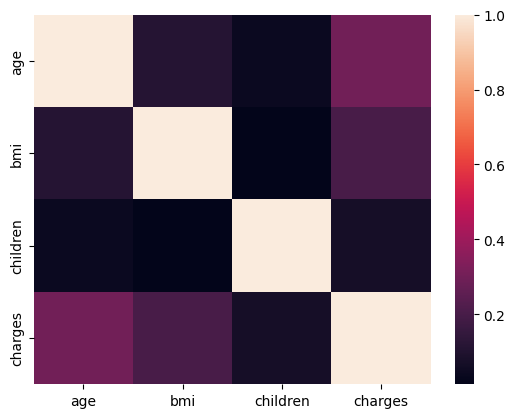

In [18]:
#Using a correlation matrix to check for correlations among the columns in the dataset
sns.heatmap(Insurance.corr())

# Checking for the distribution pattern of the “charges” column

C:\Users\Anil R\AppData\Local\Temp\ipykernel_1220\2038713231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurance['charges'])


<Axes: xlabel='charges', ylabel='Density'>

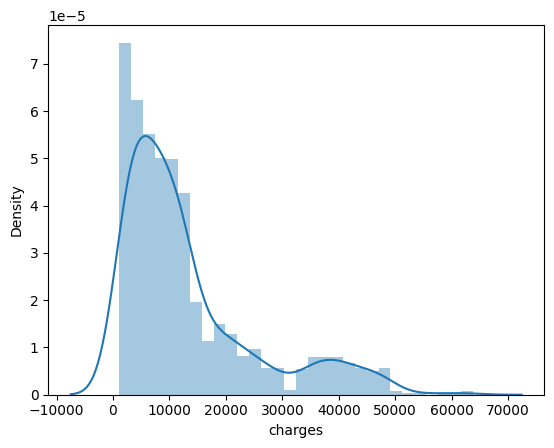

In [19]:
sns.distplot(Insurance['charges'])

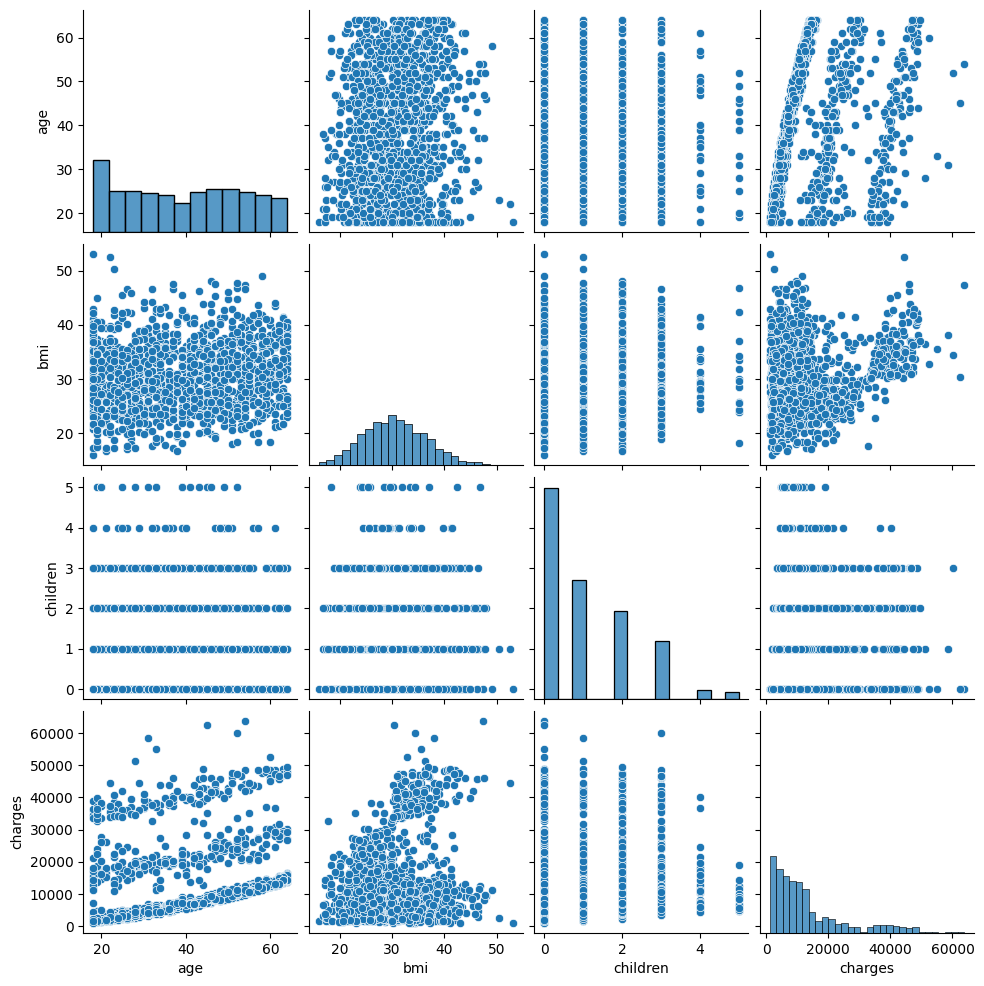

In [20]:
#Plotting a pairplot to check out the relationship that exists between one column to another
sns.pairplot(Insurance);

# Extracting dependent and independent variables:

In [21]:
x = Insurance.drop(columns = ['charges'])
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [22]:
y = Insurance['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 0)
X_train.head()

,age,sex,bmi,children,smoker,region
621,37,male,34.100,4,yes,southwest
194,18,male,34.430,0,no,southeast
240,23,female,36.670,2,yes,northeast
1168,32,male,35.200,2,no,southwest
1192,58,female,32.395,1,no,northeast


In [24]:
#Transforming categorical text data
#The data contains some columns which have texts in them, such as gender, region.
#Using the gender column as an example; assigning 0 to female and 1 to male.
X_train_ = pd.get_dummies(X_train, columns=["sex", "smoker", "region"], drop_first=True)
x_test_ =  pd.get_dummies(X_test, columns=["sex", "smoker", "region"], drop_first=True)

In [25]:
X_train_.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
621,37,34.100,4,1,1,0,0,1
194,18,34.430,0,1,0,0,1,0
240,23,36.670,2,0,1,0,0,0
1168,32,35.200,2,1,0,0,0,1
1192,58,32.395,1,0,0,0,0,0


In [26]:
#Building and fitting the model.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train_,y_train)

LinearRegression()

In [27]:
predictions = lm.predict(x_test_)
predictions

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7999876970680433

In [30]:
import pickle
#model Which We Traing DecisionTreeClassifier
# save the trained model as a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(lm, f)